DESCRIPCIÓN GENERAL DEL DATASET

Número de instancias: 3119
Número de variables: 5

Columnas: ['Unnamed: 0', 'title', 'text', 'subcategory', 'label']

--- Tipos de datos ---
Unnamed: 0      int64
title          object
text           object
subcategory    object
label           int64
dtype: object

--- Valores nulos ---
Unnamed: 0     0
title          1
text           0
subcategory    0
label          0
dtype: int64

--- Primeras 3 filas ---
   Unnamed: 0                                              title  \
0           0  FACEBOOK DELETES MICHIGAN ANTI-LOCKDOWN GROUP ...   
1           1   Other Viewpoints: COVID-19 is worse than the flu   
2           2               Bermuda's COVID-19 cases surpass 100   

                                                text subcategory  label  
0  Facebook has shuttered a popular group for Mic...  false news      0  
1  We can now officially put to rest all comparis...        true      1  
2  The Ministry of Health in Bermuda has confirme...        

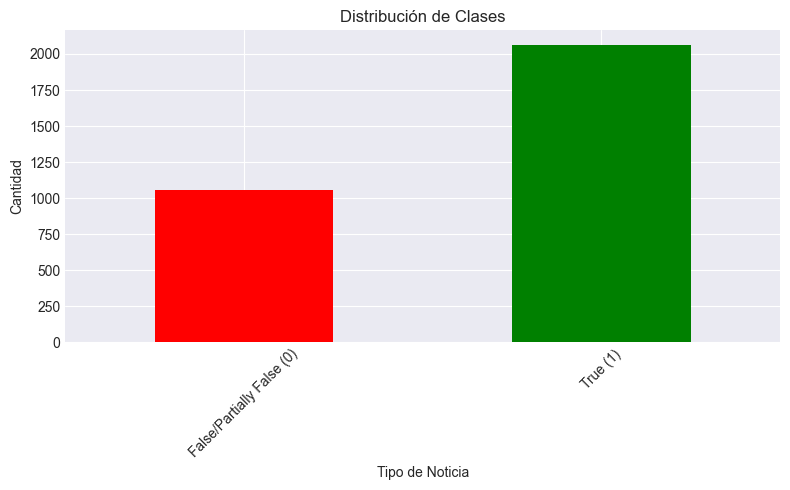


ANÁLISIS DE LONGITUD DE TEXTO

--- Estadísticas de longitud ---
        text_length   word_count
count   3119.000000  3119.000000
mean    3103.330555   502.348830
std     3128.270583   507.686093
min      105.000000    18.000000
25%     1383.000000   227.000000
50%     2256.000000   365.000000
75%     3657.000000   590.000000
max    32767.000000  5469.000000

--- Longitud promedio por clase ---
       text_length  word_count
label                         
0      3694.546314  602.611531
1      2799.834061  450.879670

--- Estadísticas de longitud ---
        text_length   word_count
count   3119.000000  3119.000000
mean    3103.330555   502.348830
std     3128.270583   507.686093
min      105.000000    18.000000
25%     1383.000000   227.000000
50%     2256.000000   365.000000
75%     3657.000000   590.000000
max    32767.000000  5469.000000

--- Longitud promedio por clase ---
       text_length  word_count
label                         
0      3694.546314  602.611531
1      2799.8340

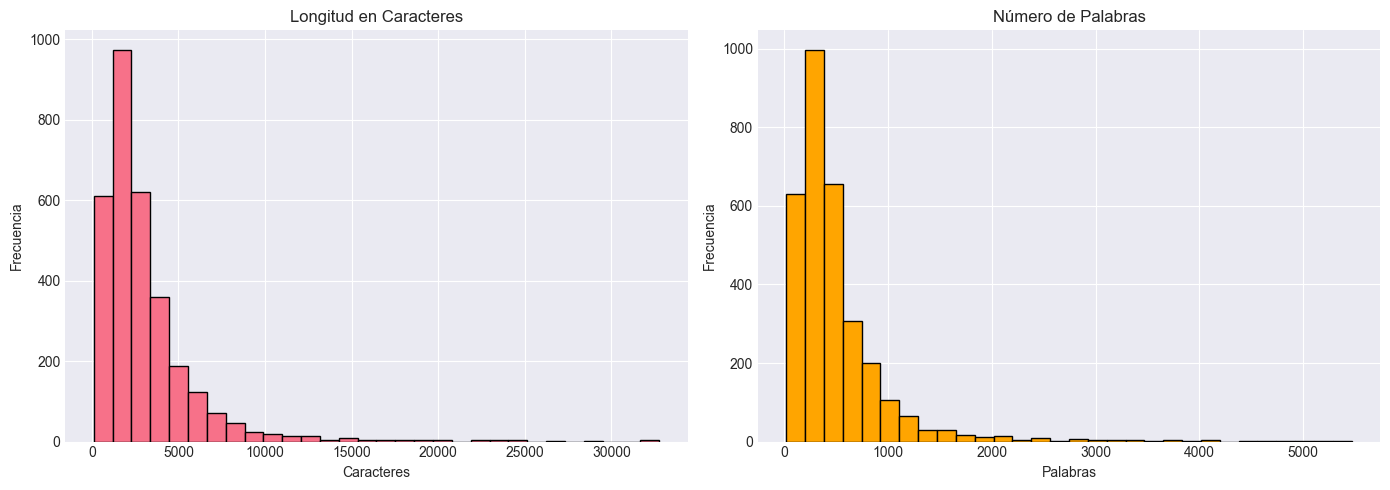


PALABRAS MÁS FRECUENTES

--- Top 15 palabras ---
the: 95854
of: 45408
to: 44836
and: 42235
in: 35114
a: 27753
is: 18881
that: 17026
for: 14534
on: 12485
with: 12352
are: 11686
virus: 11177
from: 10895
as: 10460

--- Top 15 palabras ---
the: 95854
of: 45408
to: 44836
and: 42235
in: 35114
a: 27753
is: 18881
that: 17026
for: 14534
on: 12485
with: 12352
are: 11686
virus: 11177
from: 10895
as: 10460


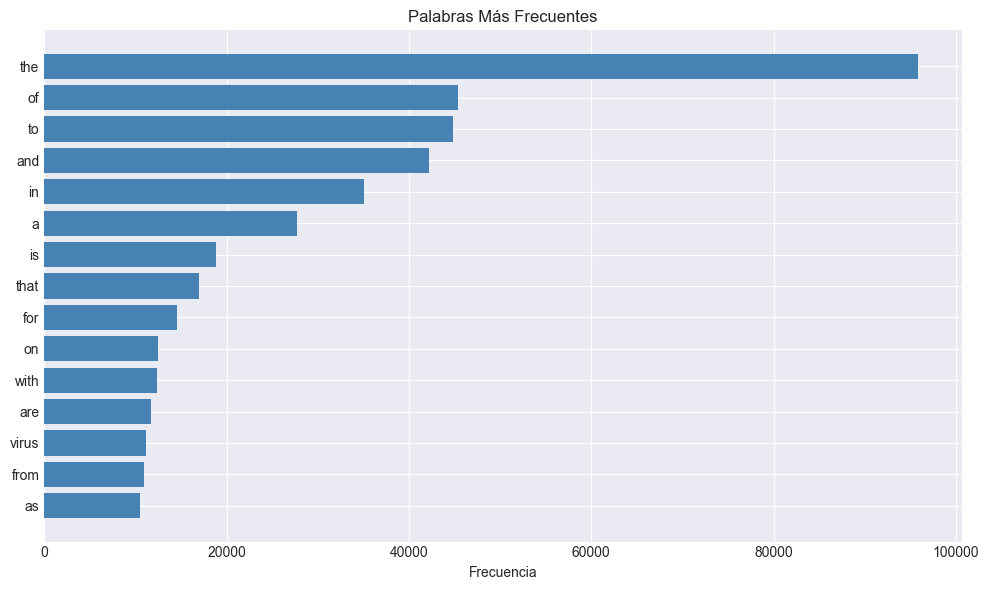


NUBE DE PALABRAS


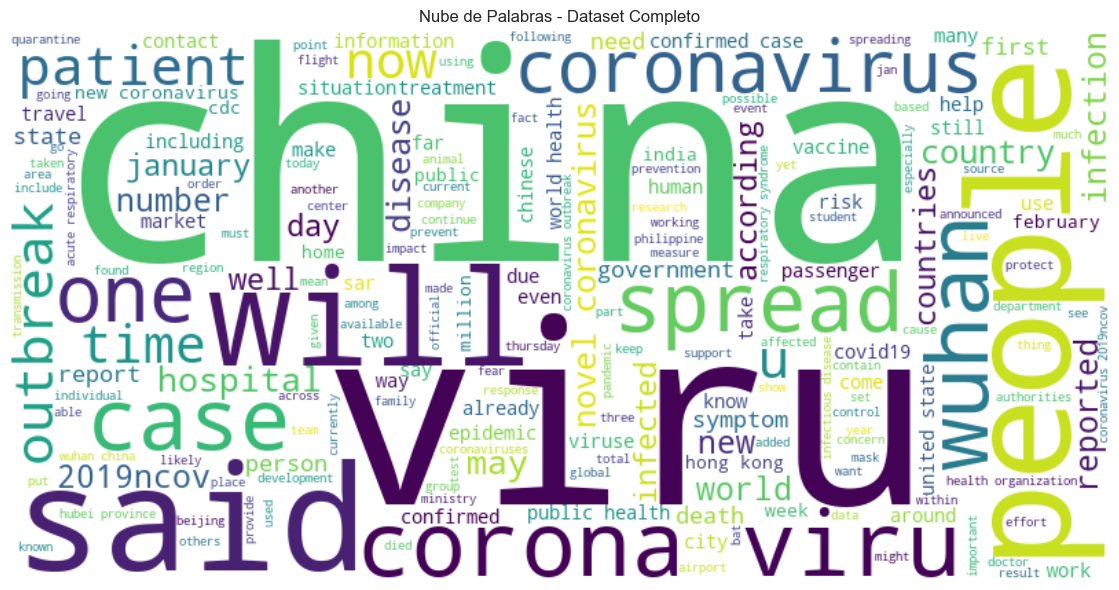

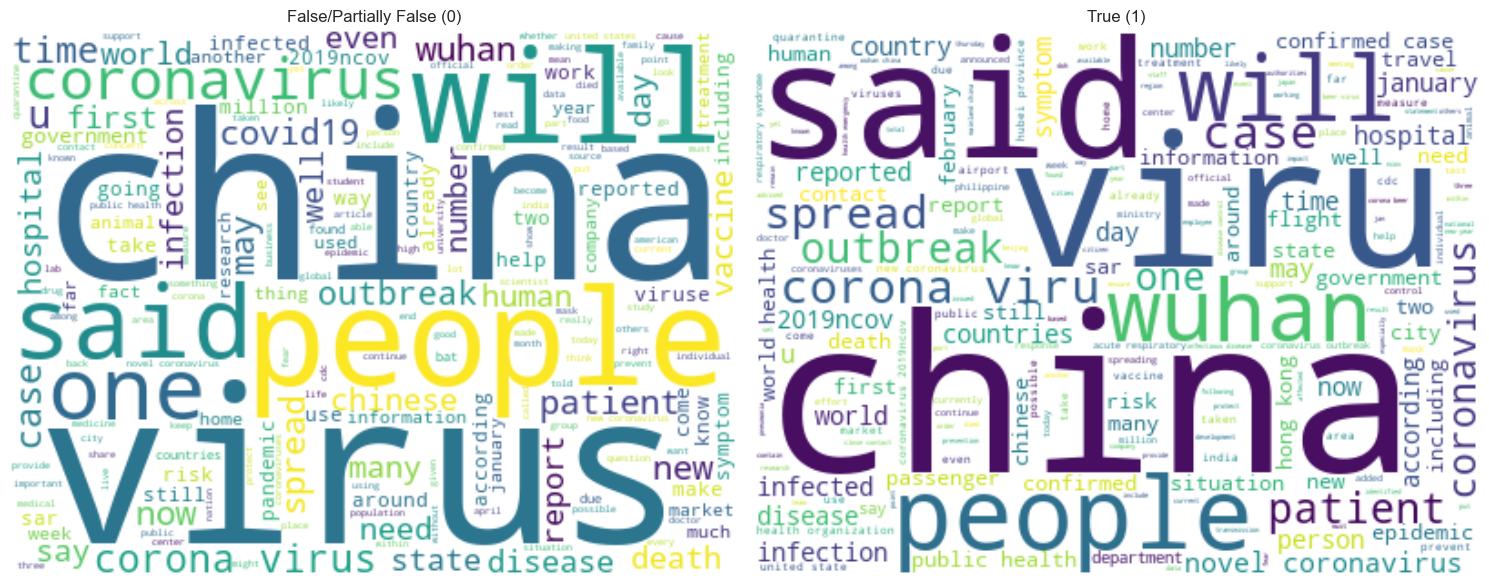


EJEMPLOS POR CLASE

--- FALSE/PARTIALLY FALSE ---

Ejemplo 1:
Facebook has shuttered a popular group for Michiganders who oppose their governor’s extreme lockdown measures, fueling debate about free speech during the coronavirus crisis.

‘Michiganders Against Ex...

Ejemplo 2:
Purdue University President Mitch Daniels, the former governor of Indiana, said in an April 21 letter he intends to open the West Lafayette, Indiana university for in-person classes in the fall, citin...

--- TRUE ---

Ejemplo 1:
We can now officially put to rest all comparisons of COVID-19 to influenza. Coronavirus is killing more Americans than the flu and almost everything else. According to data compiled by the Washington ...

Ejemplo 2:
The Ministry of Health in Bermuda has confirmed a newspaper report that 10 residents from the Westmeath Residential and Nursing Home had tested positive for COVID-19, taking the island’s total confirm...

HIPÓTESIS INICIALES

1. Las noticias falsas usan lenguaje más emociona

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re

# Cargar el conjunto de datos
data = pd.read_excel('fake_new_dataset.xlsx')

# ====================================
# 1. DESCRIPCIÓN GENERAL DEL DATASET
# ====================================
print("=" * 60)
print("DESCRIPCIÓN GENERAL DEL DATASET")
print("=" * 60)

print(f"\nNúmero de instancias: {data.shape[0]}")
print(f"Número de variables: {data.shape[1]}")
print(f"\nColumnas: {data.columns.tolist()}")

print("\n--- Tipos de datos ---")
print(data.dtypes)

print("\n--- Valores nulos ---")
print(data.isnull().sum())

print("\n--- Primeras 3 filas ---")
print(data.head(3))

# ====================================
# 2. DISTRIBUCIÓN DE CLASES
# ====================================
print("\n" + "=" * 60)
print("DISTRIBUCIÓN DE CLASES")
print("=" * 60)

print("\n--- Frecuencia por clase (label) ---")
print(f"0 (False/Partially False): {(data['label'] == 0).sum()}")
print(f"1 (True): {(data['label'] == 1).sum()}")

print(f"\nPorcentaje:")
print(f"0 (False/Partially False): {(data['label'] == 0).sum() / len(data) * 100:.2f}%")
print(f"1 (True): {(data['label'] == 1).sum() / len(data) * 100:.2f}%")

# Gráfico de distribución
plt.figure(figsize=(8, 5))
data['label'].value_counts().sort_index().plot(kind='bar', color=['red', 'green'])
plt.title('Distribución de Clases')
plt.xlabel('Tipo de Noticia')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['False/Partially False (0)', 'True (1)'], rotation=45)
plt.tight_layout()
plt.show()

# ====================================
# 3. ANÁLISIS DE LONGITUD DE TEXTO
# ====================================
print("\n" + "=" * 60)
print("ANÁLISIS DE LONGITUD DE TEXTO")
print("=" * 60)

data['text_length'] = data['text'].astype(str).apply(len)
data['word_count'] = data['text'].astype(str).apply(lambda x: len(x.split()))

print("\n--- Estadísticas de longitud ---")
print(data[['text_length', 'word_count']].describe())

# Comparación por clase
print("\n--- Longitud promedio por clase ---")
print(data.groupby('label')[['text_length', 'word_count']].mean())

# Gráficos de longitud
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(data['text_length'], bins=30, edgecolor='black')
axes[0].set_title('Longitud en Caracteres')
axes[0].set_xlabel('Caracteres')
axes[0].set_ylabel('Frecuencia')

axes[1].hist(data['word_count'], bins=30, edgecolor='black', color='orange')
axes[1].set_title('Número de Palabras')
axes[1].set_xlabel('Palabras')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# ====================================
# 4. PALABRAS MÁS FRECUENTES
# ====================================
print("\n" + "=" * 60)
print("PALABRAS MÁS FRECUENTES")
print("=" * 60)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

all_text = ' '.join(data['text'].astype(str).apply(clean_text))
words = all_text.split()
word_freq = Counter(words)
most_common = word_freq.most_common(15)

print("\n--- Top 15 palabras ---")
for word, count in most_common:
    print(f"{word}: {count}")

# Gráfico de palabras frecuentes
words_df = pd.DataFrame(most_common, columns=['Palabra', 'Frecuencia'])
plt.figure(figsize=(10, 6))
plt.barh(words_df['Palabra'], words_df['Frecuencia'], color='steelblue')
plt.xlabel('Frecuencia')
plt.title('Palabras Más Frecuentes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# ====================================
# 5. NUBE DE PALABRAS
# ====================================
print("\n" + "=" * 60)
print("NUBE DE PALABRAS")
print("=" * 60)

# Nube general
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Dataset Completo')
plt.tight_layout()
plt.show()

# Nubes por clase
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Clase 0 (False/Partially False)
text_false = ' '.join(data[data['label'] == 0]['text'].astype(str).apply(clean_text))
wordcloud_false = WordCloud(width=400, height=300, background_color='white').generate(text_false)
axes[0].imshow(wordcloud_false, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('False/Partially False (0)')

# Clase 1 (True)
text_true = ' '.join(data[data['label'] == 1]['text'].astype(str).apply(clean_text))
wordcloud_true = WordCloud(width=400, height=300, background_color='white').generate(text_true)
axes[1].imshow(wordcloud_true, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('True (1)')

plt.tight_layout()
plt.show()

# ====================================
# 6. EJEMPLOS POR CLASE
# ====================================
print("\n" + "=" * 60)
print("EJEMPLOS POR CLASE")
print("=" * 60)

# Mapear etiquetas
label_names = {0: 'FALSE/PARTIALLY FALSE', 1: 'TRUE'}

for clase in [0, 1]:
    print(f"\n--- {label_names[clase]} ---")
    ejemplos = data[data['label'] == clase]['text'].head(2)
    for i, ejemplo in enumerate(ejemplos, 1):
        print(f"\nEjemplo {i}:")
        print(str(ejemplo)[:200] + "...")

# ====================================
# 7. HIPÓTESIS INICIALES
# ====================================
print("\n" + "=" * 60)
print("HIPÓTESIS INICIALES")
print("=" * 60)

print("""
1. Las noticias falsas usan lenguaje más emocional y sensacionalista
2. Las noticias falsas pueden ser más cortas o más largas que las verdaderas
3. Ciertas palabras clave indican desinformación
4. La polarización se refleja en términos extremos
5. Las noticias falsas tienen menos detalles verificables
""")

print("\n✓ Análisis completado")